# auto feature nyc taxi + batch predict

## 1. Load Datasets

In [2]:
import pandas as pd
train_data = pd.read_csv(f"/home/vmagent/app/recdp/dataset/nyc_taxi_fare/nyc_taxi_fare_cleaned_test.csv")
print("original input is ")
display(train_data)
train_data.dtypes

original input is 


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,11.70,2012-08-07 14:34:13 UTC,-73.982002,40.736259,-73.970648,40.765006,1
1,5.30,2011-03-24 23:36:00 UTC,-73.983900,40.768083,-73.991682,40.766382,1
2,18.00,2014-12-06 15:36:00 UTC,-74.009970,40.747592,-73.985442,40.778387,1
3,21.33,2013-08-11 09:41:00 UTC,-73.976510,40.739572,-73.893083,40.724350,5
4,7.50,2013-06-11 19:45:00 UTC,-73.970482,40.752090,-73.988355,40.736322,1
...,...,...,...,...,...,...,...
2715793,17.00,2013-01-25 08:30:00 UTC,-73.973707,40.794652,-73.991230,40.749667,2
2715794,24.50,2014-04-11 12:53:51 UTC,-73.996299,40.748427,-73.953052,40.825000,1
2715795,5.50,2014-03-05 05:44:42 UTC,-73.973041,40.743972,-73.964521,40.759242,1
2715796,4.50,2009-03-27 09:34:00 UTC,-73.951167,40.774200,-73.952370,40.768218,3


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
from pyrecdp.datasets import pretrained

model_file_path = pretrained().download("nyc_taxi_fare")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.87M/5.87M [00:02<00:00, 2.30MB/s]


## 2. Generate pipeline for predict

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


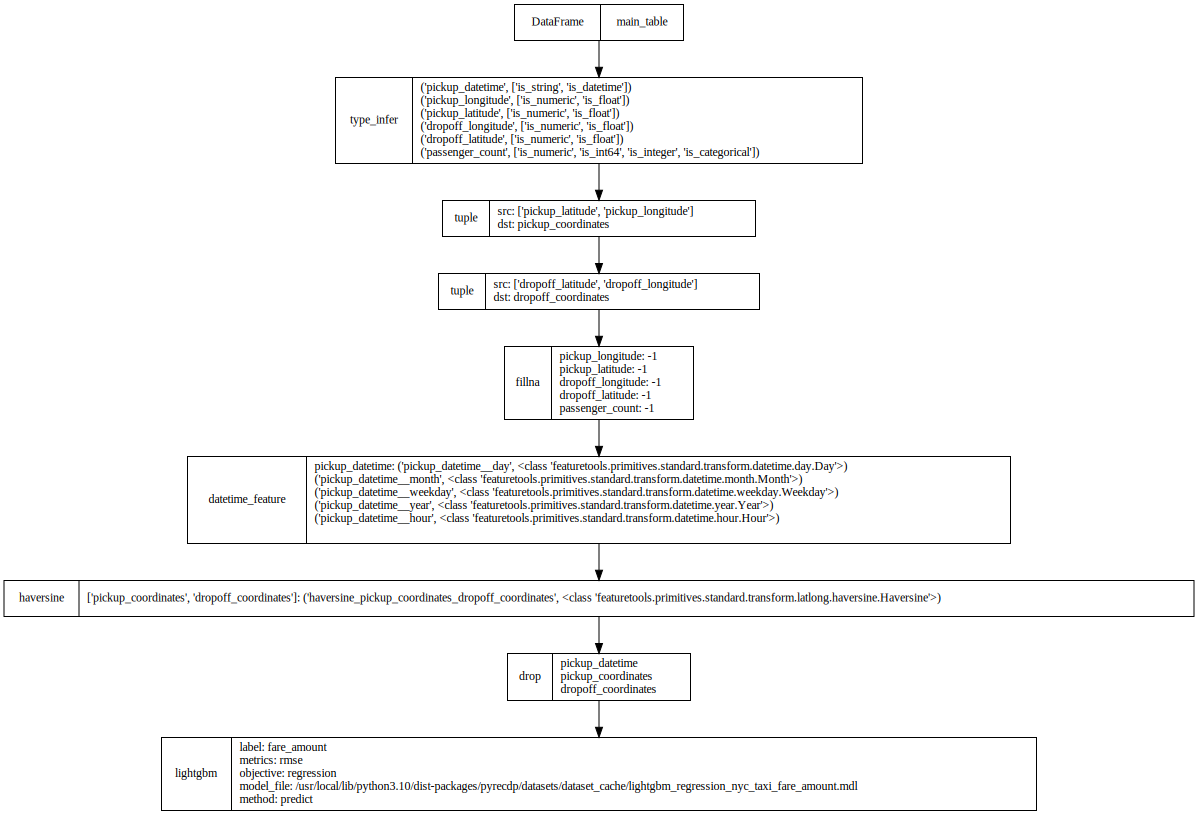

In [6]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator
from pyrecdp.autofe import DataEstimator

data_pipeline = FeatureWrangler(dataset=train_data, label="fare_amount")
pipeline = DataEstimator(metrics = 'rmse', model_name='lightgbm', method = 'predict', data_pipeline = data_pipeline, model_file = model_file_path)
pipeline.plot()

## 3. execute pipeline with spark

In [7]:
transformed_data = pipeline.fit_transform('spark')
display(transformed_data)

Will assign 48 cores and 308513 M memory for spark
23/03/10 05:00:09 WARN Utils: Your hostname, sr419 resolves to a loopback address: 127.0.1.1; using 10.0.2.19 instead (on interface ens818f1)
23/03/10 05:00:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/10 05:00:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
per core memory size is 6.277 GB and shuffle_disk maximum capacity is 8589934592.000 GB
append DataFrame
append type_infer
append DataFrameToRDDConverter
DataframeConvert partition pandas dataframe to spark RDD took 1.227 secs
append tuple
append tuple
append fillna
append datetime_feature
append haversine
append drop
append lightgbm
append RDDToDataFrameConverter
23/03/10 05:00:12 WARN TaskSetManager: Stage 0 contains a task of very large size (4351 KiB). The maximum recommended task size is 1000 KiB.


DataframeTransform took 9.256 secs, processed 2715798 rows with num_partitions as 200
DataframeTransform combine to one pandas dataframe took 0.120 secs
This test_data contains label, rmse is 3.5692552156213626


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime__day,pickup_datetime__month,pickup_datetime__weekday,pickup_datetime__year,pickup_datetime__hour,haversine_pickup_coordinates_dropoff_coordinates,predict_value
0,11.70,-73.982002,40.736259,-73.970648,40.765006,1,7,8,1,2012,14,2.073232,10.293349
1,5.30,-73.983900,40.768083,-73.991682,40.766382,1,24,3,3,2011,23,0.423846,4.225492
2,18.00,-74.009970,40.747592,-73.985442,40.778387,1,6,12,5,2014,15,2.484935,14.208471
3,21.33,-73.976510,40.739572,-73.893083,40.724350,5,11,8,6,2013,9,4.492820,23.322001
4,7.50,-73.970482,40.752090,-73.988355,40.736322,1,11,6,1,2013,19,1.436067,8.676244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715793,17.00,-73.973707,40.794652,-73.991230,40.749667,2,25,1,4,2013,8,3.240587,17.349422
2715794,24.50,-73.996299,40.748427,-73.953052,40.825000,1,11,4,4,2014,12,5.754123,26.699107
2715795,5.50,-73.973041,40.743972,-73.964521,40.759242,1,5,3,2,2014,5,1.145432,6.492575
2715796,4.50,-73.951167,40.774200,-73.952370,40.768218,3,27,3,4,2009,9,0.418083,4.569482


## 4. export pipeline to JSON

In [4]:
pipeline.export()

{
    "0": {
        "children": null,
        "op": "DataFrame",
        "config": "main_table"
    },
    "1": {
        "children": [
            0
        ],
        "op": "type_infer",
        "config": [
            [
                "pickup_datetime",
                [
                    "is_string",
                    "is_datetime"
                ]
            ],
            [
                "pickup_longitude",
                [
                    "is_numeric",
                    "is_float"
                ]
            ],
            [
                "pickup_latitude",
                [
                    "is_numeric",
                    "is_float"
                ]
            ],
            [
                "dropoff_longitude",
                [
                    "is_numeric",
                    "is_float"
                ]
            ],
            [
                "dropoff_latitude",
                [
                    "is_numeric",
                    "is